### Loading Library

In [1]:
# Step 1: Load the Libraries
import os
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import joblib

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset
file_path = 'Crop_Recommendation.csv'  # Replace with your file path
data = pd.read_csv(file_path)


### Step 3: Non-Graphical Exploratory Analysis

In [3]:
print("Data Head:\n", data.head())
print("\nData Info:\n")
data.info()

Data Head:
    Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     Rainfall  Crop  
0  202.935536  Rice  
1  226.655537  Rice  
2  263.964248  Rice  
3  242.864034  Rice  
4  262.717340  Rice  

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Va

In [4]:
print("\nMissing Values:\n", data.isnull().sum())
print("\nBasic Statistics:\n", data.describe())
print("\nClass Distribution:\n", data['Crop'].value_counts())


Missing Values:
 Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

Basic Statistics:
           Nitrogen   Phosphorus    Potassium  Temperature     Humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

          pH_Value     Rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       

In [5]:
# Perform basic statistics for an overview of the data
basic_stats = data.describe()

# Display the basic statistics
basic_stats

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


###  Graphical Exploratory Analysis

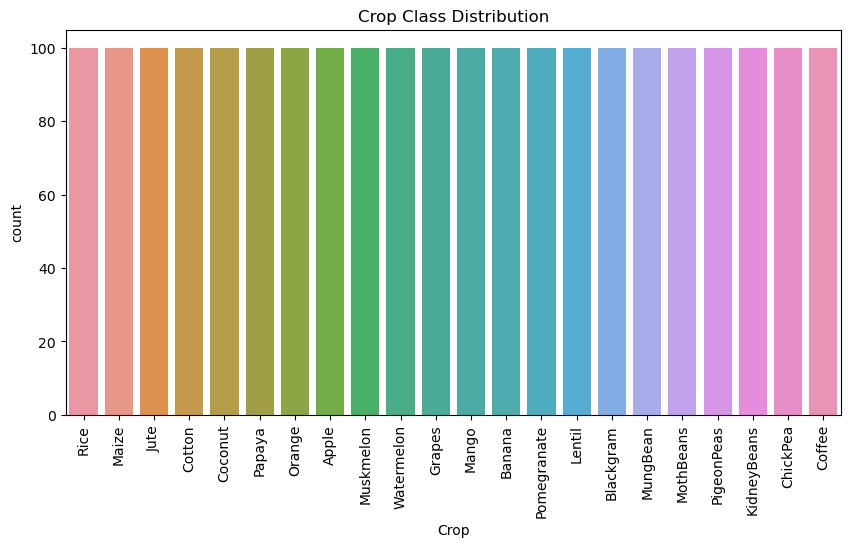

In [6]:

plt.figure(figsize=(10, 5))
sns.countplot(x='Crop', data=data, order=data['Crop'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Crop Class Distribution')
plt.show()


The distribution of the Crop variable shows that the dataset contains a wide variety of crops evanly distributed

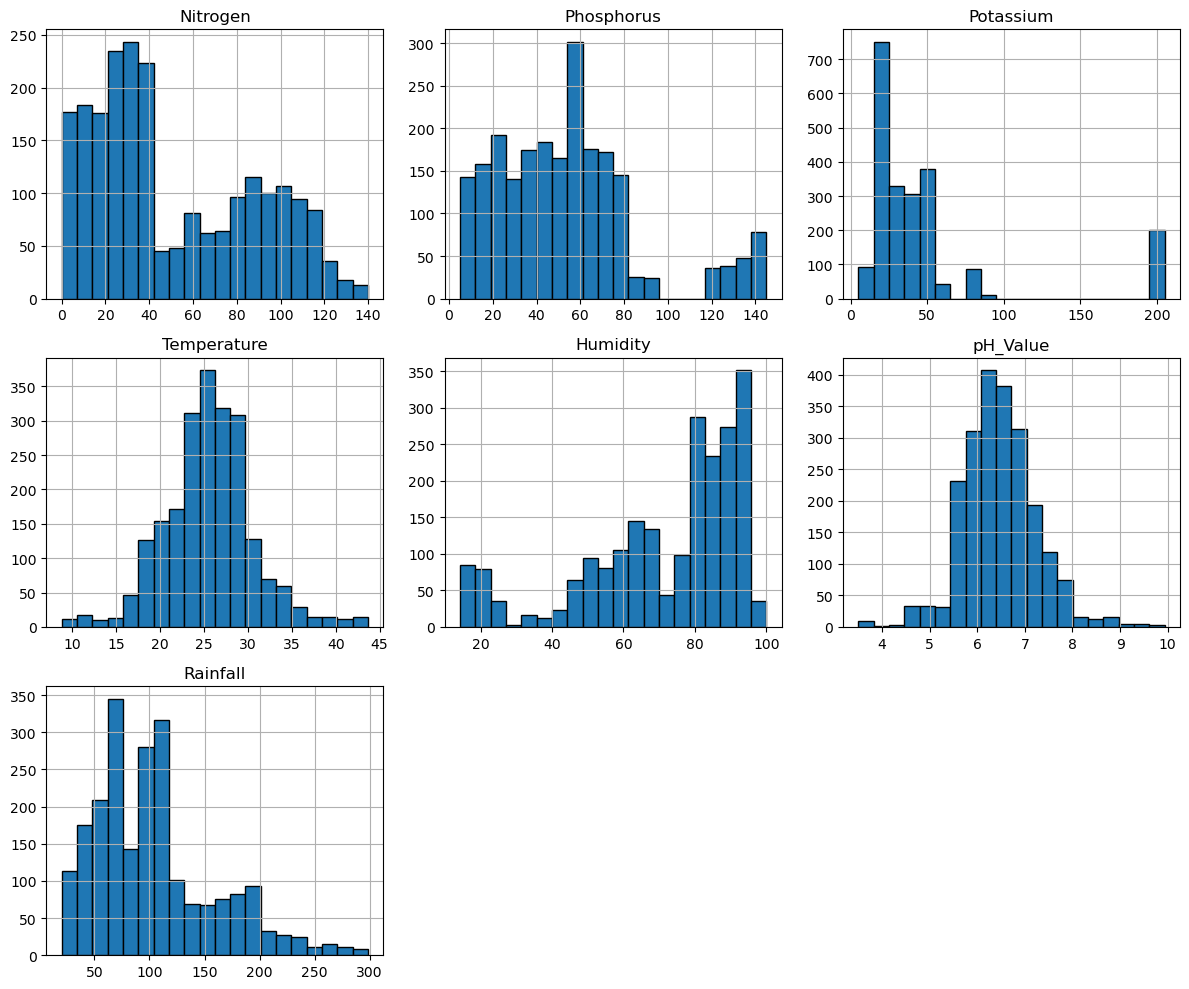

In [7]:
# Plot Histograms for Numerical Features
data.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

The histograms show the distribution of each numerical feature in the dataset:

Nitrogen, Phosphorus, Potassium: These have a broad range of values, with a higher concentration of data points towards the lower end of the scale.
Temperature and Humidity: These appear to be more normally distributed, though with some skew.
pH_Value: The distribution is fairly tight around a central value with less variance.
Rainfall: This feature also shows a spread but is more concentrated in the lower range.

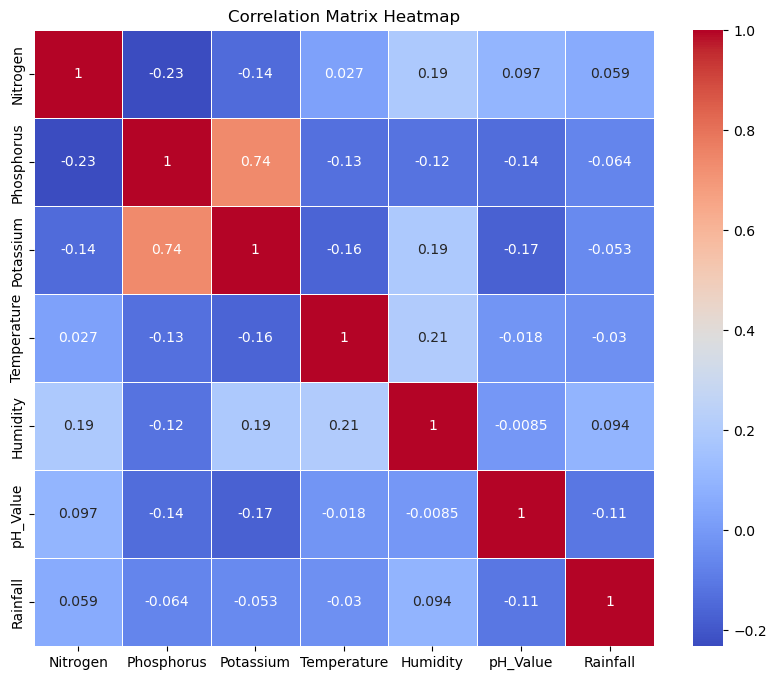

In [8]:
# # Correlation Matrix Heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix Heatmap')
# plt.show()

# Filter out non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation matrix heatmap shows the relationships between the numerical features in the dataset:

- There are generally low correlations between the features, with the exception of a few pairs that show moderate correlations
- Features like Temperature and Humidity have a slight negative correlation, but no features exhibit strong linear relationships with each other

This suggests that each feature contributes somewhat independently to the model, and multicollinearity might not be a major issue.

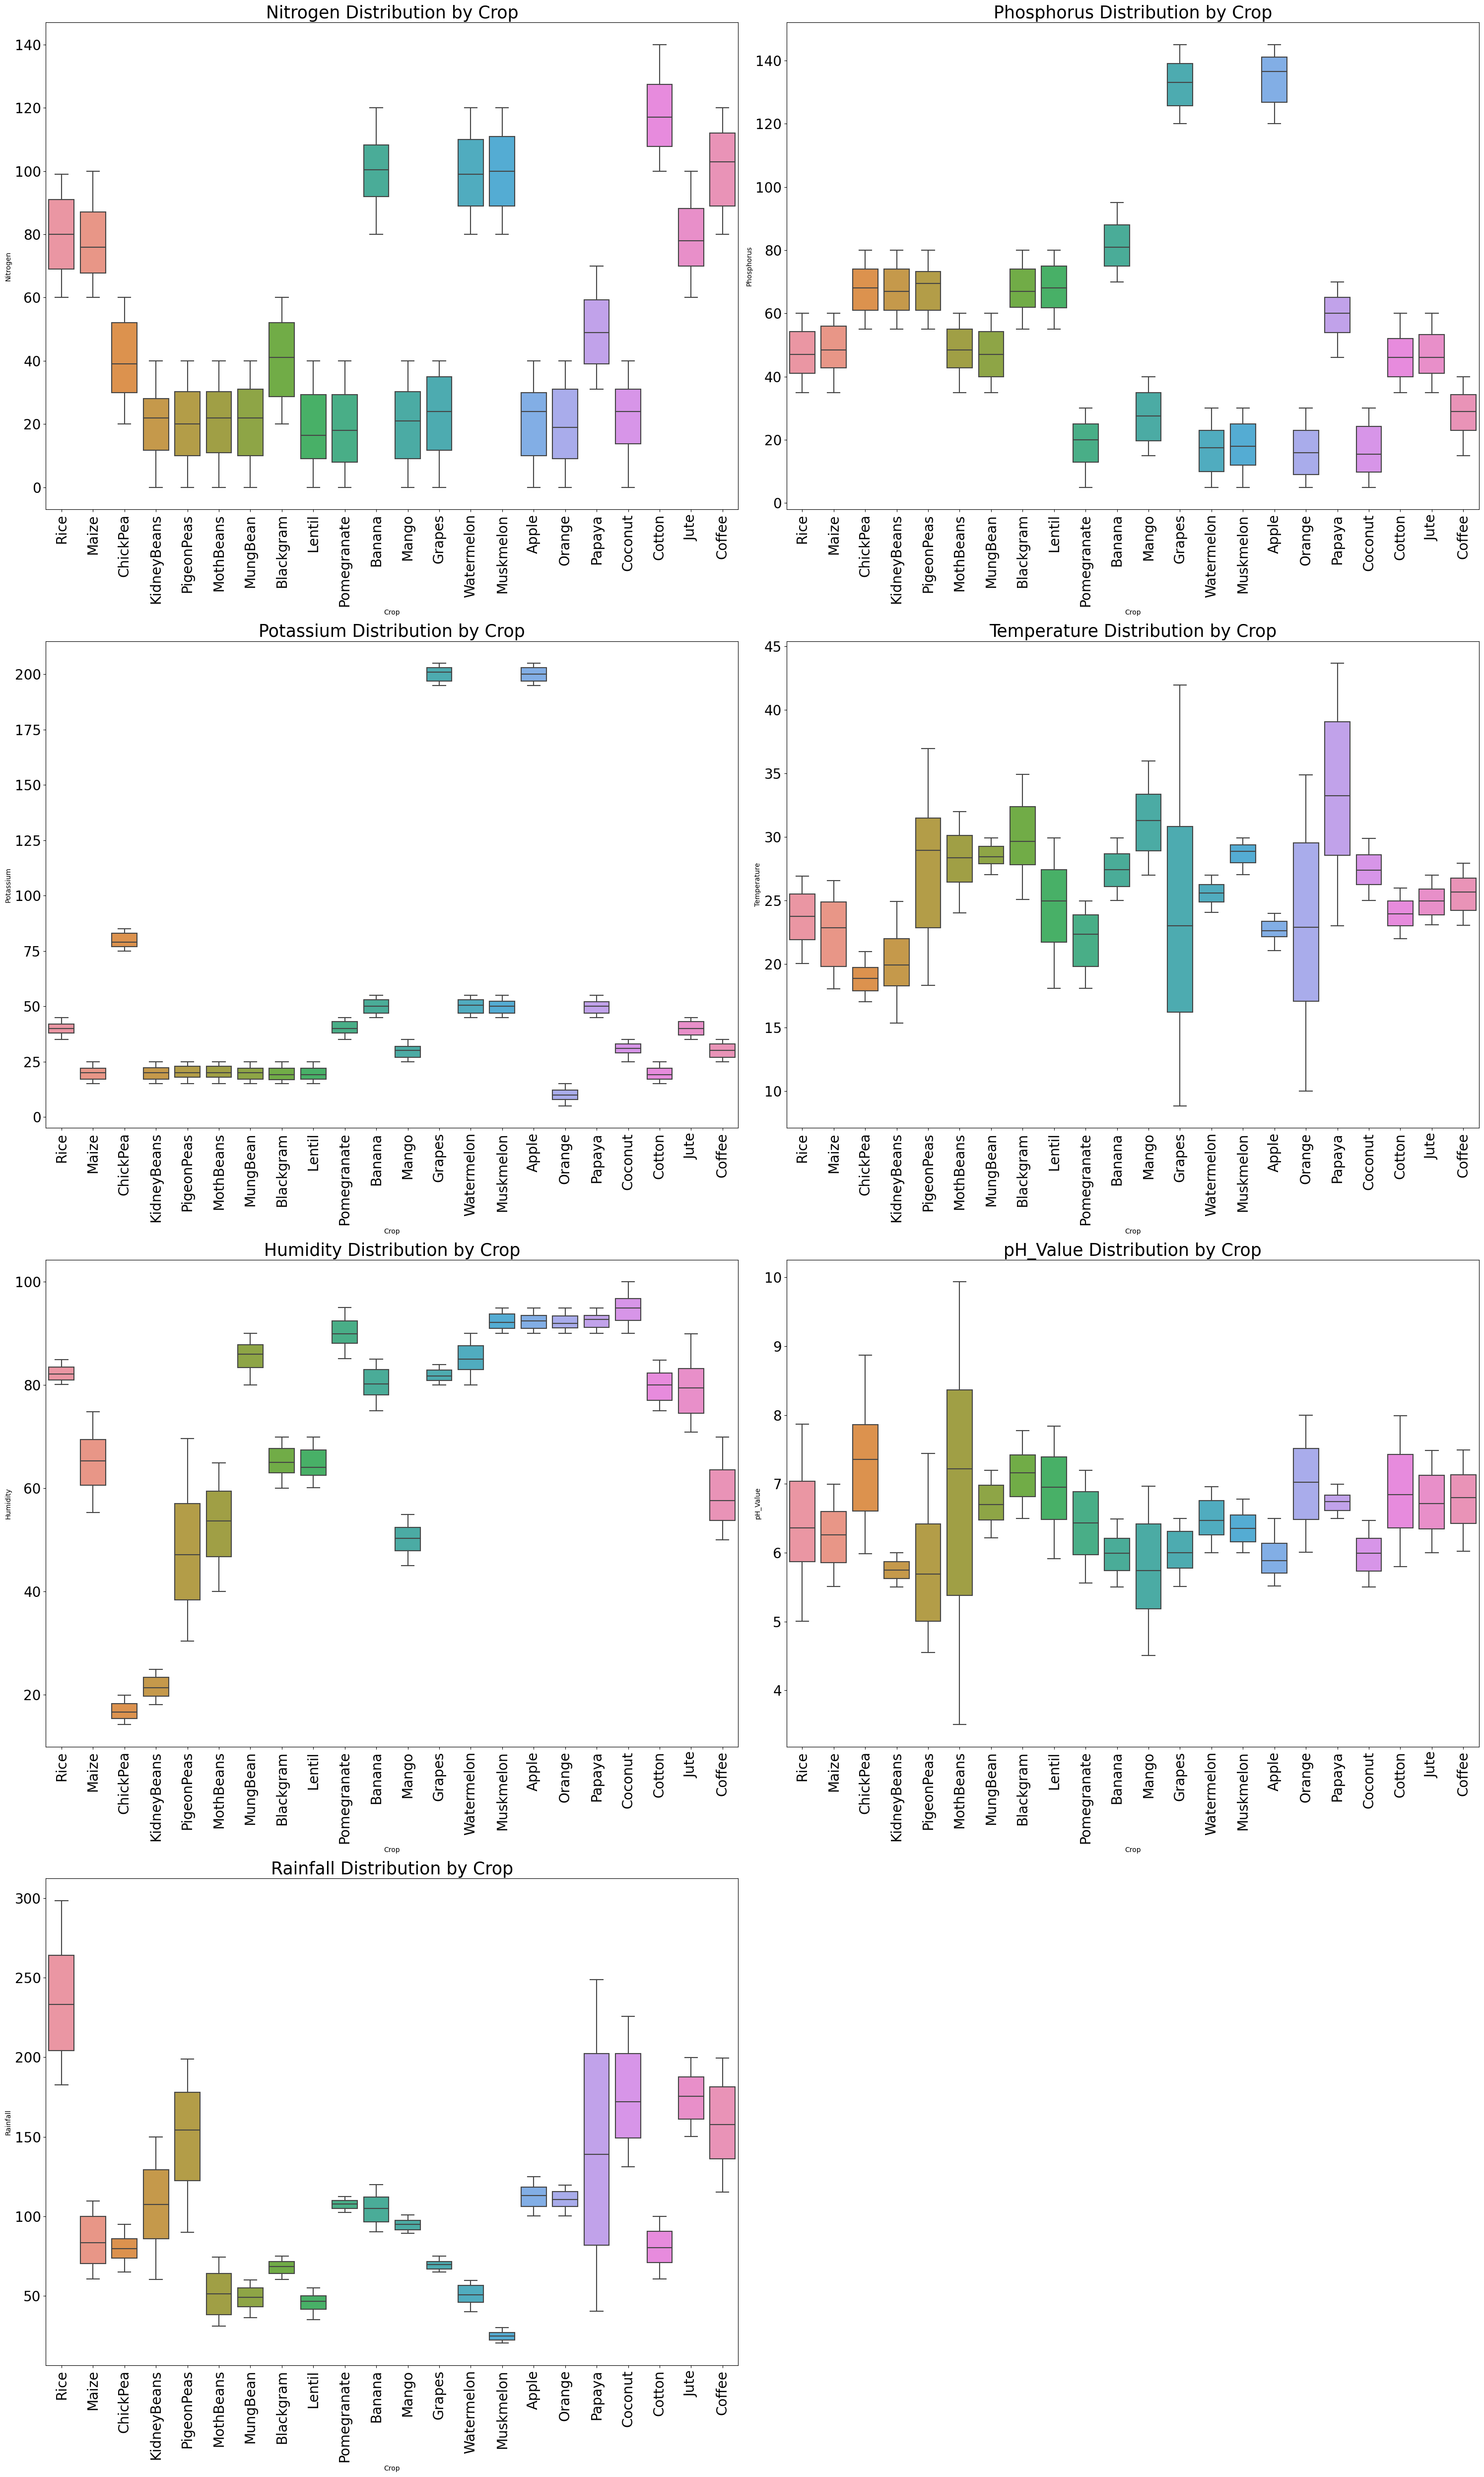

In [9]:
plt.figure(figsize=(30, 50))  # Adjusted figure size for better legibility with two plots per row
for i, column in enumerate(data.columns[:-1], 1):  # Exclude the 'Crop' column
    plt.subplot(len(data.columns[:-1]) // 2 + len(data.columns[:-1]) % 2, 2, i)  # 2 columns per row
    sns.boxplot(x='Crop', y=column, data=data)
    plt.xticks(rotation=90, fontsize=20)  # Increased font size for x-axis labels
    plt.yticks(fontsize=20)  # Increased font size for y-axis labels
    plt.title(f'{column} Distribution by Crop', fontsize=25)  # Increased font size for titles
plt.tight_layout()
plt.show()

The box plots reveal the distribution of each numerical feature across the different crop types:

- Nitrogen, Phosphorus, Potassium: These nutrients show varying distributions across different crops, indicating that the requirement of these nutrients varies significantly between crops.
- Temperature, Humidity, pH_Value, Rainfall: These environmental factors also vary across crops, suggesting that different crops thrive under different conditions

### Preprocessing 

In [10]:
#Outlier Detection and Handling (Using IQR method)
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [11]:
# Define columns to check for outliers
numerical_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']
data_cleaned = remove_outliers(data, numerical_columns)

In [12]:
data_cleaned

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,Rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [13]:
# Step 3: Handle Imbalanced Dataset (Using SMOTE for oversampling)
X = data_cleaned.drop('Crop', axis=1)  # Features
y = data_cleaned['Crop']  # Target

In [14]:
# Split data into Train, Validation, and Test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [15]:
# Feature Scaling (Standard Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Save the fitted scaler for later use in the web app
joblib.dump(scaler, 'C:/Users/HP/OneDrive/Desktop/Karatu/Predictive_Model/Crop-Recommendation/crop_prediction_app/scaler/scaler.joblib')

['C:/Users/HP/OneDrive/Desktop/Karatu/Predictive_Model/Crop-Recommendation/crop_prediction_app/scaler/scaler.joblib']

### Model Training and Evaluation on Validation Set

In [16]:
# Dictionary to store accuracy results
model_performance = {}

### Train and Save the Logistic Regression Model

In [17]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_val_pred = lr_model.predict(X_val_scaled)
lr_val_accuracy = accuracy_score(y_val, lr_val_pred)
model_performance["Logistic Regression"] = lr_val_accuracy
print(f"Logistic Regression Accuracy: {lr_val_accuracy}")
joblib.dump(lr_model, 'C:/Users/HP/OneDrive/Desktop/Karatu/Predictive_Model/Crop-Recommendation/crop_prediction_app/models/logistic_regression_model.joblib')

Logistic Regression Accuracy: 0.967479674796748


['C:/Users/HP/OneDrive/Desktop/Karatu/Predictive_Model/Crop-Recommendation/crop_prediction_app/models/logistic_regression_model.joblib']

 ## Train and Save the Random Forest Model

In [18]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_val_pred = rf_model.predict(X_val_scaled)
rf_val_accuracy = accuracy_score(y_val, rf_val_pred)
model_performance["Random Forest"] = rf_val_accuracy
print(f"Random Forest Accuracy: {rf_val_accuracy}")
joblib.dump(rf_model, 'C:/Users/HP/OneDrive/Desktop/Karatu/Predictive_Model/Crop-Recommendation/crop_prediction_app/models/random_forest_model.joblib')



Random Forest Accuracy: 0.994579945799458


['C:/Users/HP/OneDrive/Desktop/Karatu/Predictive_Model/Crop-Recommendation/crop_prediction_app/models/random_forest_model.joblib']

### Train and Save the Gradient Boosting Model

In [19]:
# Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_val_pred = gb_model.predict(X_val_scaled)
gb_val_accuracy = accuracy_score(y_val, gb_val_pred)
model_performance["Gradient Boosting"] = gb_val_accuracy
print(f"Gradient Boosting Accuracy: {gb_val_accuracy}")
joblib.dump(gb_model, 'C:/Users/HP/OneDrive/Desktop/Karatu/Predictive_Model/Crop-Recommendation/crop_prediction_app/models/gradient_boosting_model.joblib')

Gradient Boosting Accuracy: 0.986449864498645


['C:/Users/HP/OneDrive/Desktop/Karatu/Predictive_Model/Crop-Recommendation/crop_prediction_app/models/gradient_boosting_model.joblib']

### Train and Save the Support Vector Machine (SVM) Model

In [20]:
# Support Vector Machine (SVM) Model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_val_pred = svm_model.predict(X_val_scaled)
svm_val_accuracy = accuracy_score(y_val, svm_val_pred)
model_performance["SVM"] = svm_val_accuracy
print(f"Support Vector Machine Accuracy: {lr_val_accuracy}")
joblib.dump(svm_model, 'C:/Users/HP/OneDrive/Desktop/Karatu/Predictive_Model/Crop-Recommendation/crop_prediction_app/models/svm_model.joblib')

Support Vector Machine Accuracy: 0.967479674796748


['C:/Users/HP/OneDrive/Desktop/Karatu/Predictive_Model/Crop-Recommendation/crop_prediction_app/models/svm_model.joblib']

### Load Models and Evaluate on the Test Set with Confusion Matrices

Logistic Regression Test Accuracy: 0.9568
Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Banana       1.00      1.00      1.00        20
   Blackgram       0.80      1.00      0.89        20
    ChickPea       1.00      1.00      1.00        18
     Coconut       1.00      1.00      1.00        20
      Coffee       1.00      1.00      1.00        20
      Cotton       0.95      0.95      0.95        20
        Jute       0.94      0.80      0.86        20
 KidneyBeans       0.95      0.95      0.95        20
      Lentil       0.95      0.95      0.95        20
       Maize       0.90      0.95      0.93        20
       Mango       1.00      1.00      1.00        20
   MothBeans       1.00      0.58      0.74        12
    MungBean       1.00      1.00      1.00        20
   Muskmelon       1.00      1.00      1.00        20
      Orange       1.00      1.00      1.00        16
      Papaya       1.00      1.00      1.00       

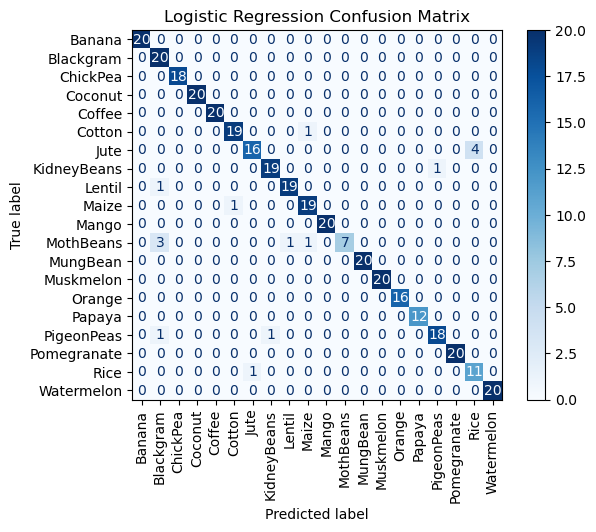

SVM Test Accuracy: 0.9784
SVM Classification Report:
              precision    recall  f1-score   support

      Banana       1.00      1.00      1.00        20
   Blackgram       0.95      1.00      0.98        20
    ChickPea       1.00      1.00      1.00        18
     Coconut       1.00      1.00      1.00        20
      Coffee       1.00      1.00      1.00        20
      Cotton       1.00      1.00      1.00        20
        Jute       0.89      0.85      0.87        20
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       0.91      1.00      0.95        20
       Maize       1.00      1.00      1.00        20
       Mango       1.00      1.00      1.00        20
   MothBeans       1.00      0.83      0.91        12
    MungBean       1.00      1.00      1.00        20
   Muskmelon       1.00      1.00      1.00        20
      Orange       1.00      1.00      1.00        16
      Papaya       1.00      1.00      1.00        12
  PigeonPeas       1.00     

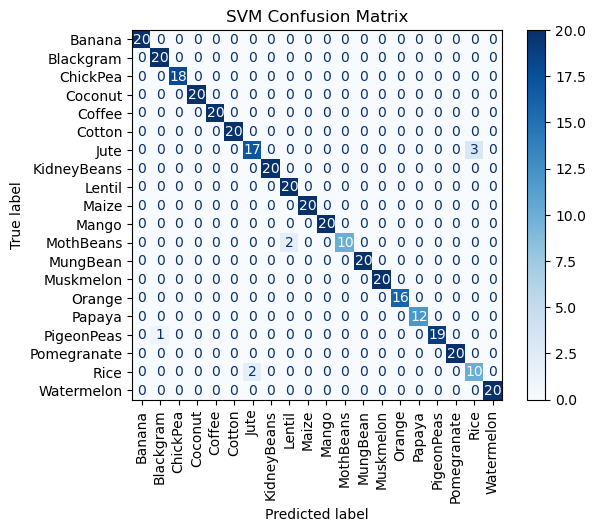

Random Forest Test Accuracy: 0.9919
Random Forest Classification Report:
              precision    recall  f1-score   support

      Banana       1.00      1.00      1.00        20
   Blackgram       1.00      1.00      1.00        20
    ChickPea       1.00      1.00      1.00        18
     Coconut       1.00      1.00      1.00        20
      Coffee       1.00      1.00      1.00        20
      Cotton       1.00      1.00      1.00        20
        Jute       1.00      0.90      0.95        20
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       0.95      1.00      0.98        20
       Maize       1.00      1.00      1.00        20
       Mango       1.00      1.00      1.00        20
   MothBeans       1.00      0.92      0.96        12
    MungBean       1.00      1.00      1.00        20
   Muskmelon       1.00      1.00      1.00        20
      Orange       1.00      1.00      1.00        16
      Papaya       1.00      1.00      1.00        12
  Pigeon

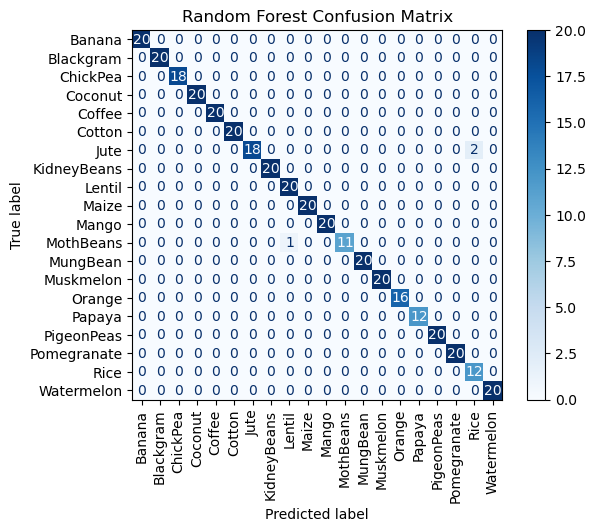

Gradient Boosting Test Accuracy: 0.9811
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

      Banana       1.00      1.00      1.00        20
   Blackgram       0.91      1.00      0.95        20
    ChickPea       1.00      1.00      1.00        18
     Coconut       1.00      0.95      0.97        20
      Coffee       1.00      0.90      0.95        20
      Cotton       1.00      1.00      1.00        20
        Jute       0.86      0.95      0.90        20
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       1.00      1.00      1.00        20
       Maize       0.95      1.00      0.98        20
       Mango       1.00      1.00      1.00        20
   MothBeans       1.00      0.92      0.96        12
    MungBean       1.00      1.00      1.00        20
   Muskmelon       1.00      1.00      1.00        20
      Orange       1.00      1.00      1.00        16
      Papaya       1.00      0.92      0.96        12


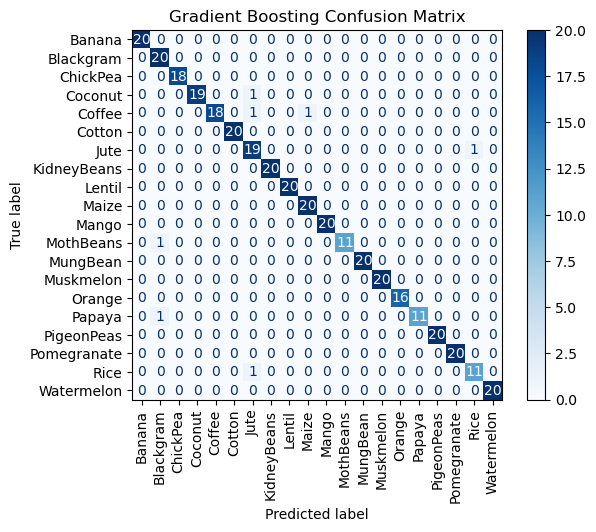

In [24]:
# List of models with full paths
models = [
    "C:/Users/HP/OneDrive/Desktop/Karatu/Predictive_Model/Crop-Recommendation/crop_prediction_app/models/Logistic Regression",
    "C:/Users/HP/OneDrive/Desktop/Karatu/Predictive_Model/Crop-Recommendation/crop_prediction_app/models/SVM",
    "C:/Users/HP/OneDrive/Desktop/Karatu/Predictive_Model/Crop-Recommendation/crop_prediction_app/models/Random Forest",
    "C:/Users/HP/OneDrive/Desktop/Karatu/Predictive_Model/Crop-Recommendation/crop_prediction_app/models/Gradient Boosting"
]

for model_path in models:
    # Extract only the model name (e.g., 'Logistic Regression', 'SVM', etc.)
    model_name = os.path.basename(model_path)
    
    # Construct the full path to the model file
    model_file_name = f'{model_path.lower().replace(" ", "_")}_model.joblib'
    
    # Load the model using the full path
    model = joblib.load(model_file_name)
    
    # Predict and calculate accuracy
    test_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Print the model name (without path) and the accuracy
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")
    
    # Classification Report
    report = classification_report(y_test, test_pred, target_names=model.classes_)
    print(f"{model_name} Classification Report:")
    print(report)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, test_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', xticks_rotation=90)
    plt.title(f'{model_name} Confusion Matrix')  # Title with just the model name
    plt.show()
    
    print("="*100)
 